# Thinkful Capstone Project: "Etsy Epiphany"
### By Tiani Calip

# Problem Addressed

## Personal Interest and Problem
My mom owns an Etsy online store and is constantly stressing out about how well her products are doing, what price she should be listing her products at, and what product she should make and sell next. I want to create a solution for her to be able to identify what the most popular products are, how the reviews trend over time, and how the sentiment of review text maps against the review ratings. This way, she would be able to see how her products are doing compared to similar items on Etsy, and be able to respond to the demand for certain types of popular items and create and sell her own. Sometimes, she doesn’t understand why one shirt sells more than another. Providing review mapping and sentiment analysis will allow her and other users to identify what qualities of their products are favorable or not, be able to address those during production, and thereby possibly increase their chance of getting favorited.  

## Goal  
Using NLP and machine learning techniques, I will identify the top 20 important qualities (description, title, and tags) needed for any given Etsy user to use to improve their chance of getting favorited.  

## Hypothesis
By using machine learning and NLP, I can give suggesthions on product descriptions and help a store increase their favorites by 5%.

### Gameplan:   
Get the shop info for every shop that can be found with the keyword: "Disney"  
Use shop_ids to get the listing info   
Use the value of the feedback to train a classification model to know when a sentiment is positive or negative  
Identify the most important digrams/phrases in a shop's collective messages that lead to a positive sentiment  
Compare prices of the listings that have those positive sentiments  
Compare # of favorites to price of the listings with the positive sentiments  
Compare that with my mom's sentiments and prices and give suggestions for price and product qualities


fork out positive reviews and negative. see what ppl are saying abt both, give advice to the stores for what they could change abt their stores and improve.  
give suggestions abt what shop can do that others/competetors are doing  


## Impact  
I can determine the important qualities of a product that lead to the best reviews and review sentiments, then identify the most optimal price to increase the number of favorites. This can help my mom and any other prospective users to get ideas for their next products, and have confidence to list the products at an optimal price for both the seller and the buyer.  

# Dataset  
Data source = Etsy itself! I used the Etsy API to collect the data in real time from shops that have the keyword "Disney"

## Existing Efforts
No existing Etsy apps look at both review scores and sentiments in an effort to identofy important qualities. I'm excited to see if I can be the first!  

# Project Concerns


## Assumptions
I am making the assumption that the limits and offset that I chose for my API requests will give me a good representation of the Disney themed Etsy store population

## Risks (of data or models)
This is my first time using an API outside of the Thinkful course. I do not expect it to be an easy learning curve.  
Some data that would be ideal requires an OAuthentification, which means any user I want to scrape data from needs to verify and approve my data scraping. I do not want random users to feel threatened by my data grabbing, so I will have to go in a roundabout way to grab the data I want.  

## Questions Resulting
What is the best way to measure my scenario (binary outcome, probability outcome, or quantitative outcome)?


# Outcomes
## Shop Level
__Top 10 vocabulary:__  
Descriptions: 'button', 'band', 'ornament', 'check', 'epcot', 'fits', 'Christmas', 'shirts', 'listings', 'image'  
Messages: 'magic', 'shipping', 'trip', 'christmas', 'ordered', 'shirts', 'family', 'disney', 'husband', 'pin'  
Tags: 'epcot', 'band', 'vinyl', 'magic', 'ornament', 'custom', 'silver', 'movie', 'cruise', 'tank'

__Bottom 10 vocabulary:__  
Descriptions: 'return', 'buy', 'item', 'cost', 'hang', 'pictures', 'mail', 'shirt', 'shipping', 'design  
Messages: None (Makes sense because no one would favorite an item they didn't like)  
Tags: 'stitch', 'new', 'fantasy', 'vacation', 'wars', 'star', 'girls', 'gold', 'vintage', 'book'  

## Listing Level
__Top 10 vocabulary:__   
Descriptions: 'premium', 'tiki', 'important', 'seas', 'mid', 'cross', 'release', 'themed', 'altered', 'founder'  
Titles: 'stripes', 'favors', '1982', 'lapel', 'ring', 'dole', 'whip', '5x5', 'autograph', 'tramp'  
Tags: 'make', 'theme', 'solo', 'lions', 'treat', 'miss', 'unisex', 'company', 'california', 'illustration'  

__Bottom 10 vocabulary:__   
Descriptions: 'rock', 'enjoying', 'race', 'identify', '9x12', 'protected', 'lighter', 'zootopia', 'occasions', 'dole'  
Titles: 'years', 'painting', 'crown', 'boho', 'youth', 'add', 'spider', 'retrocot', 'card', 'instant'  
Tags: '1982', 'mickeys', 'lapel', 'paper', 'bob', 'han', 'lightyear', 'ironman', 'terror', 'boy'  


It seems:   
- As time increases since creation, the number of favorites decrease  
- As the number of listings per shop increases, the number of favorites increases  
- As the price increases, the number of favorites slightly increases  
- As the rating value of the shop increases, the number of favorites slightly decreases  

According to our correlation matrix, the strongest correlation is 0.52, between the number of favorites and listing active count. 

## Future work:
Look at the number of sales of those listing, which requires shop owner access and authentication to grab that data.
Compare sales to price of the listings with the positive sentiments.  
See how changing the descriptions, titles, tags, and prices can increase favorites and sales.  

In [177]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import ensemble
%matplotlib inline
sns.set(style="whitegrid")

# import NLP packages
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [6]:
# Open up the csv with the final data frame for this project
final_df = pd.read_csv('final_df.csv')

# Count Vectorizer

In [7]:
final_df

,user_id,shop_name,num_favorites,title,description,tags,price,message,value,listing_active_count,creation_yr
0,20413,DisneyObscura,355.0,Moana toddler baby with Stitch crossover mashu...,Baby Moana making friends with Stitch on the b...,"moana, baby moana, toddler moana, stitch, beac...",57.277778,"if i could give this 1,000 stars i would!! i l...",1.000000,18,2006
1,6112479,DisneyBottleCaps,1113.0,Disney Princess POCAHONTAS 3D Finished Bottle ...,♥ Finished Bottle Cap ♥Finished Bottle Caps fo...,"disney, disney princess, princess pocahontas, ...",7.759690,Perfect party favor for my daughter’s birthday...,0.992278,226,2015
2,7543374,DisneyGirl84,12.0,Princess Leia custom disney ears,These cute ears are inspired by Star Wars and ...,"gifts, disney, vacation, disneyland, star wars...",20.000000,Great buyer and easy to communicate with Grea...,1.000000,1,2011
3,8082338,disneyfarmhouse,0.0,Disney autograph signing board Disney autograp...,"Disneyland, Walt Disney World, or Disney cruis...",,15.000000,"I was expecting a canvas, and got a night piec...",1.000000,5,2018
4,11738325,DisneyDivas,26.0,Personalized superhero t shirt Personalized Ba...,Personalized super hero t shirt with super kid...,"super hero, marvel, spiderman, superman, batma...",14.400000,Came a little late but is excellent work.,1.000000,5,2013
5,18713976,NataliFashionDOLL,121.0,Clothing For Dolls DisneyAnimators Clothing Fo...,"Disney Animator, suitable for all dolls in thi...","clothes for dolls, dress, doll sandals, 50cm...",18.032258,Purchased two dresses and they are both AMAZIN...,1.000000,31,2018
6,19856189,DisneyBlueLine,153.0,Thank you for your service coin Thin Blue Line...,This is a Fantasy coin 2.5 inches cut I to a M...,,9.615385,My friend loved her birthday present. Thank yo...,1.000000,13,2016
7,20850951,MakingCruiseMemories,2652.0,"Disney Cruise Door Magnets Disney Shirt Man, I...",**NEW LARGER SIZE LITTLE HEADS**You will recei...,"disney cruise, disney magnet, cruise magnet, d...",14.485054,"My daughter loves this shirt, fast delivery! B...",0.987500,184,2013
8,20986912,disneyaddictedears,0.0,Marie! Deadpool! Animal print Frozen! Pink lad...,Cuz I'm a lady! Lovely pair of Marie ears! Per...,"marie marvel, deadpool animal print anna and e...",23.459459,I love my new ears!!! Going to Disney in Decem...,1.000000,37,2016
9,21726696,DesignedMemories46,288.0,Minnie Mouse Autograph & Scrapbook Minnie Mous...,Trying to capture those perfect Disney moments...,"disney photo album, signature books, disneylan...",34.375000,Beautiful album and amazing communication from...,1.000000,16,2015


In [8]:
# Creating the tf-idf matrix.
counter = TfidfVectorizer(lowercase=True,
                          stop_words='english',
                          ngram_range=(1, 1), 
                          analyzer=u'word',
                          max_df=.5,
                          min_df=10,
                          max_features=None,
                          vocabulary=None,
                          binary=False)

In [9]:
# TFIDF Vectorizer applied to all shops' messages
msg_list = final_df['message'].fillna('').values.tolist()
# Applying the vectorizer
msg_data_counts = counter.fit_transform(msg_list)
vocab_msg = counter.get_feature_names()

# TFIDF Vectorizer applied to all shops' descriptions
dsc_list = final_df['description'].fillna('').values.tolist()
# Clean just in case
dsc_list = [d.replace('\r', '').replace(
    '\n', '').replace('1&quot;', '') for d in dsc_list]
# Applying the vectorizer
dsc_data_counts = counter.fit_transform(dsc_list)
vocab_dsc = counter.get_feature_names()

# TFIDF Vectorizer applied to all shops' tags
tag_list = final_df['tags'].fillna('').values.tolist()
# Applying the vectorizer
tag_data_counts = counter.fit_transform(tag_list)
vocab_tag = counter.get_feature_names()

# grab all shops' avg prices
price_list = final_df['price'].values

# grab all shops' active num of listings
listing_count_list = final_df['listing_active_count'].values

# grab all shops' creation times (epoch seconds)
creation_yr_list = final_df['creation_yr'].values

# grab all shops' avg rating value
value_list = final_df['value'].values

In [10]:
# Manage shapes of lists
price_list.shape = (len(price_list), 1)
listing_count_list.shape = (len(listing_count_list), 1)
creation_yr_list.shape = (len(creation_yr_list), 1)
value_list.shape = (len(value_list), 1)

In [11]:
# Confirm the shapes all have the same num of rows and at least one column
print(msg_data_counts.shape)
print(dsc_data_counts.shape)
print(tag_data_counts.shape)
print(price_list.shape)
print(listing_count_list.shape)
print(creation_yr_list.shape)
print(value_list.shape)

(127, 431)
(127, 686)
(127, 245)
(127, 1)
(127, 1)
(127, 1)
(127, 1)


In [12]:
# Concatenate all the lists together into a matrix
X_matrix = np.concatenate((msg_data_counts.toarray(), dsc_data_counts.toarray(
), tag_data_counts.toarray(), price_list, listing_count_list, creation_yr_list), axis=1)
# I found out that avg rating value actually inc error, so don't include in X_matrix
X_matrix.shape

(127, 1365)

In [13]:
# Set y
y = final_df['num_favorites'].values

Now, I will attempt various linear regressions to see which regression model best predicts the liklihood of a shop getting favorited.  
Methodology: do train test split, fit transform on X_matrix  
Models attempted: Lasso, Multivariate Linear Regression  
Make sure num favs prediction is less using all the words averaging than regressors

In [14]:
# Import packages for lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [86]:
# Run lasso regression on X_matrix
lasso = Lasso(alpha=.5)
err = []
err_dumb = []
for train, test in kf.split(X_matrix):
    print(" ")
    X_train = X_matrix[train]
    y_train = y[train]
    X_test = X_matrix[test]
    lasso.fit(X_train, y_train)
    y_test = y[test]
    y_pred = lasso.predict(X_test)
    err.append(np.mean(np.abs(y_pred - y_test)))
    y_pred_dumb = np.array([np.mean(y_train)]*len(y_test))
    err_dumb.append(np.mean(np.abs(y_pred_dumb - y_test)))
print(err)
print()
print(err_dumb)
print()
print('The avg errors for each regression model:')
print(np.mean(err))
print()
print(np.mean(err_dumb))

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[1016.8519683780166, 1523.6366802544928, 635.6894312777522, 651.5131433346902, 624.9586020239745]

[1027.6527037319115, 1810.616527037319, 758.92, 757.8019607843137, 730.6894117647058]

The avg errors for each regression model:
890.5299650537852

1017.13612066365


Great! It seems like the error for our lasso regression model is not as high as when we take the averages and predict that way
Next I will try and compare the results with ridge regression.  

In [124]:
# Play around with the alpha parameter and see if we can improve it
ridgeregr = linear_model.Ridge(alpha=0.35)
err = []
err_dumb = []
for train, test in kf.split(X_matrix):
    print(" ")
    X_train = X_matrix[train]
    y_train = y[train]
    X_test = X_matrix[test]
    ridgeregr.fit(X_train, y_train)
    y_test = y[test]
    y_pred = ridgeregr.predict(X_test)
    err.append(np.mean(np.abs(y_pred - y_test)))
    y_pred_dumb = np.array([np.mean(y_train)]*len(y_test))
    err_dumb.append(np.mean(np.abs(y_pred_dumb - y_test)))

# Examine the error
print(err)
print()
print(err_dumb)
print()
print(np.mean(err))
print()
print(np.mean(err_dumb))

 
 
 
 
 
[964.8285865898943, 1476.1563748740077, 640.3198176690727, 559.9259056157036, 438.14688261536185]

[1027.6527037319115, 1810.616527037319, 758.92, 757.8019607843137, 730.6894117647058]

815.8755134728079

1017.13612066365


In [125]:
# Calc coef
print("Lasso coefficient avg:")
print(np.mean(lasso.coef_[0:-3] != 0))
print("Ridge coefficient avg:")
print(np.mean(ridgeregr.coef_[0:-3] != 0))

Lasso coefficient avg:


NameError: name 'lasso' is not defined

It seems like the __Ridge Regression__ model gives better results because the error is less than the error from the lasso regression.  
Moving forward we will use the Ridge Regression model for our visualizations and calculations.  
It seems like many of our vocab words add noise and make the regression model less accurate. Next, I will identify the most influential words and examine the affects each word have on the liklihood of the shop being favorited, and then feature engineer my regressor accordingly.

In [126]:
coef_copy = np.copy(np.abs(ridgeregr.coef_[0:-3]))
coef_copy.sort()
coef_copy

array([1.59436439e-01, 2.71158690e-01, 3.37399928e-01, ...,
       1.32078604e+03, 1.37117819e+03, 1.73505114e+03])

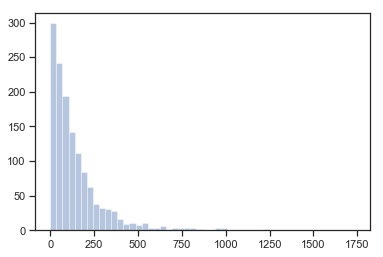

In [127]:
bx = sns.distplot(coef_copy, kde=False, rug=False)

Data is understandably not normal, We have a nice drop off as values increase. 

In [128]:
# Create a vocab list and calc coef
np.mean(ridgeregr.coef_[0:-3] > 0)  # price is out
vocab = vocab_msg + vocab_dsc + vocab_tag
feature_type = ['message'] * len(vocab_msg) + ['description'] * \
    len(vocab_dsc) + ['tag'] * len(vocab_tag)
temp_df = pd.DataFrame({'vocab': vocab, 'coef': ridgeregr.coef_[
                       0:-3], 'feature_type': feature_type})

In [129]:
# These are the words that have an influence on whether ppl fav the shop or not
influential_words = temp_df[temp_df['coef'] != 0]

In [130]:
# Group by the vocab's feature type
temp_df.groupby('feature_type').agg('count')

,coef,vocab
feature_type,,
description,686,686
message,431,431
tag,245,245


According to this table, the majority of the words that are influential on whether an item is favorited are description features. The next influential one is tags, and lastly message. This shows that since shop owners set their own descriptions and tags, when done right, they can have a big impact on encouraging the number of favorites they get.

This is good news for shop owners like my mom, and encourages all shop owners to take their descriptions and tags seriously.

In [131]:
# Sort the influential words
influential_words = pd.DataFrame(influential_words.drop_duplicates().groupby(
    ['vocab', 'feature_type'])['coef'].mean().sort_values(ascending=False)).reset_index()
influential_words

,vocab,feature_type,coef
0,button,description,1735.051141
1,band,description,1371.178188
2,ornament,description,1320.786041
3,magic,message,1220.278301
4,shipping,message,1219.039421
5,check,description,1208.775373
6,trip,message,1117.893624
7,epcot,tag,998.885543
8,epcot,description,992.184148
9,christmas,message,978.341305


In [132]:
# Identify the top 20 descriptions, tags, and messages positively associated with being favorited

beneficial_desc = influential_words[influential_words['feature_type'] == 'description'].head(
    10)
beneficial_tag = influential_words.loc[influential_words['feature_type'] == 'tag'].head(
    10)
beneficial_msg = influential_words.loc[influential_words['feature_type'] == 'message'].head(
    10)

# Identify the top 20 words negatively
harmful_desc = influential_words.loc[influential_words['feature_type']
                                     == 'description'].tail(10)
harmful_tag = influential_words.loc[influential_words['feature_type']
                                    == 'tag'].tail(10)
harmful_msg = influential_words.loc[influential_words['feature_type']
                                    == 'messsage'].tail(10)

In [133]:
beneficial_desc

,vocab,feature_type,coef
0,button,description,1735.051141
1,band,description,1371.178188
2,ornament,description,1320.786041
5,check,description,1208.775373
8,epcot,description,992.184148
12,fits,description,964.628296
14,christmas,description,867.283183
16,shirts,description,794.336745
18,listings,description,759.591833
20,image,description,722.029639


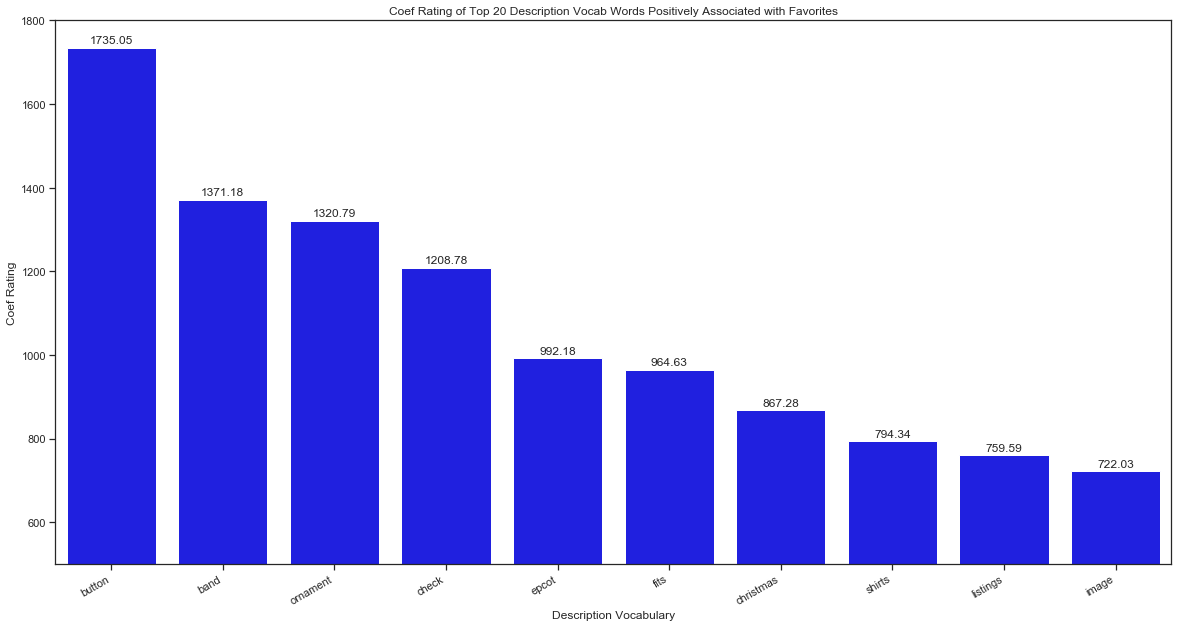

In [134]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=beneficial_desc, x='vocab',
                 y='coef', color='blue', saturation=0.75)
ax.set(title='Coef Rating of Top 20 Description Vocab Words Positively Associated with Favorites',
       xlabel='Description Vocabulary', ylabel='Coef Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylim(500, 1800)

# Display values


def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 10
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


# Show plot
show_values_on_bars(ax)
plt.show()

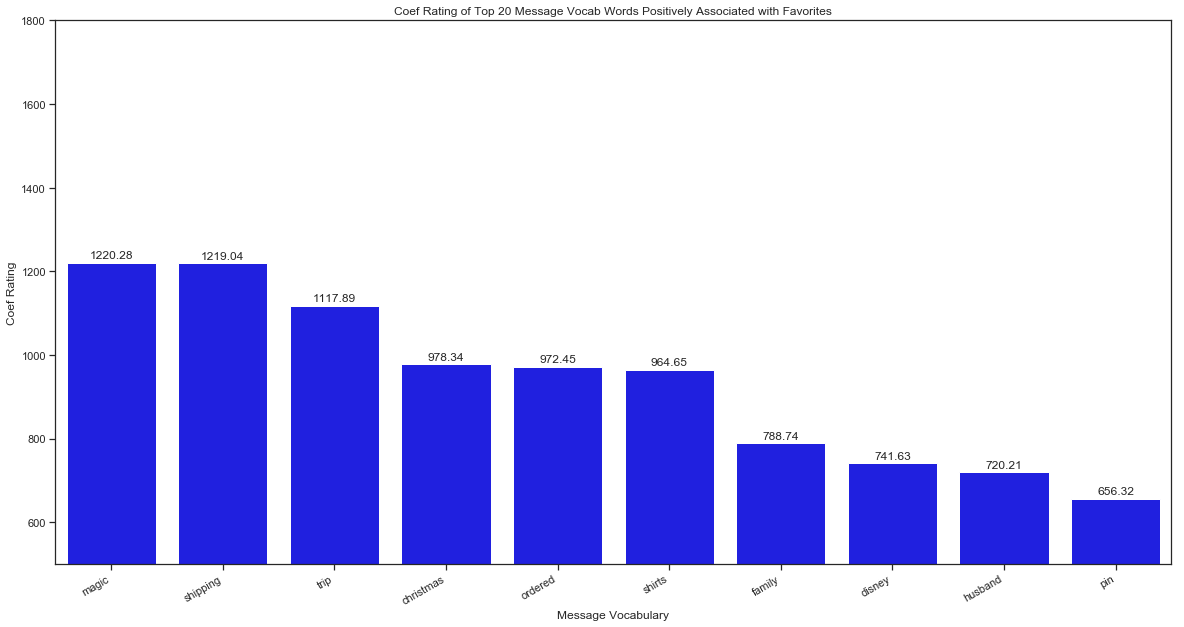

In [98]:
# Set up the matplotlib figure.
f, a1x = plt.subplots(figsize=(20, 10))
a1x = sns.barplot(data=beneficial_msg, x='vocab',
                  y='coef', color='blue', saturation=0.75)
a1x.set(title='Coef Rating of Top 20 Message Vocab Words Positively Associated with Favorites',
        xlabel='Message Vocabulary', ylabel='Coef Rating')
a1x.set_xticklabels(a1x.get_xticklabels(), rotation=30, ha='right')
plt.ylim(500, 1800)
# Display values


def show_values_on_bars(a1xs):
    def _show_on_single_plot(a1x):
        for p in a1x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 10
            value = '{:.2f}'.format(p.get_height())
            a1x.text(_x, _y, value, ha="center")

    if isinstance(a1xs, np.ndarray):
        for idx, ax in np.ndenumerate(a1xs):
            _show_on_single_plot(a1x)
    else:
        _show_on_single_plot(a1xs)


# Show plot
show_values_on_bars(a1x)
plt.show()

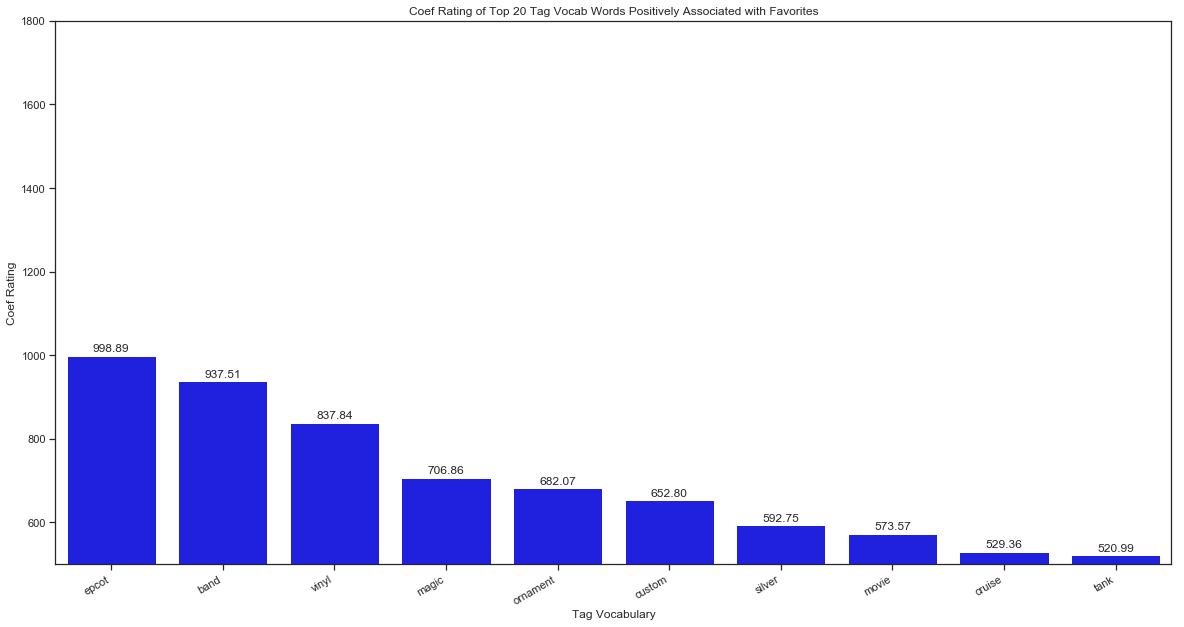

In [99]:
# Set up the matplotlib figure.
f, a2x = plt.subplots(figsize=(20, 10))
a2x = sns.barplot(data=beneficial_tag, x='vocab',
                  y='coef', color='blue', saturation=0.75)
a2x.set(title='Coef Rating of Top 20 Tag Vocab Words Positively Associated with Favorites',
        xlabel='Tag Vocabulary', ylabel='Coef Rating')
a2x.set_xticklabels(a2x.get_xticklabels(), rotation=30, ha='right')
plt.ylim(500, 1800)
# Display values


def show_values_on_bars(a2xs):
    def _show_on_single_plot(a2x):
        for p in a2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 10
            value = '{:.2f}'.format(p.get_height())
            a2x.text(_x, _y, value, ha="center")

    if isinstance(a2xs, np.ndarray):
        for idx, ax in np.ndenumerate(a2xs):
            _show_on_single_plot(a2x)
    else:
        _show_on_single_plot(a2xs)


# Show plot
show_values_on_bars(a2x)
plt.show()

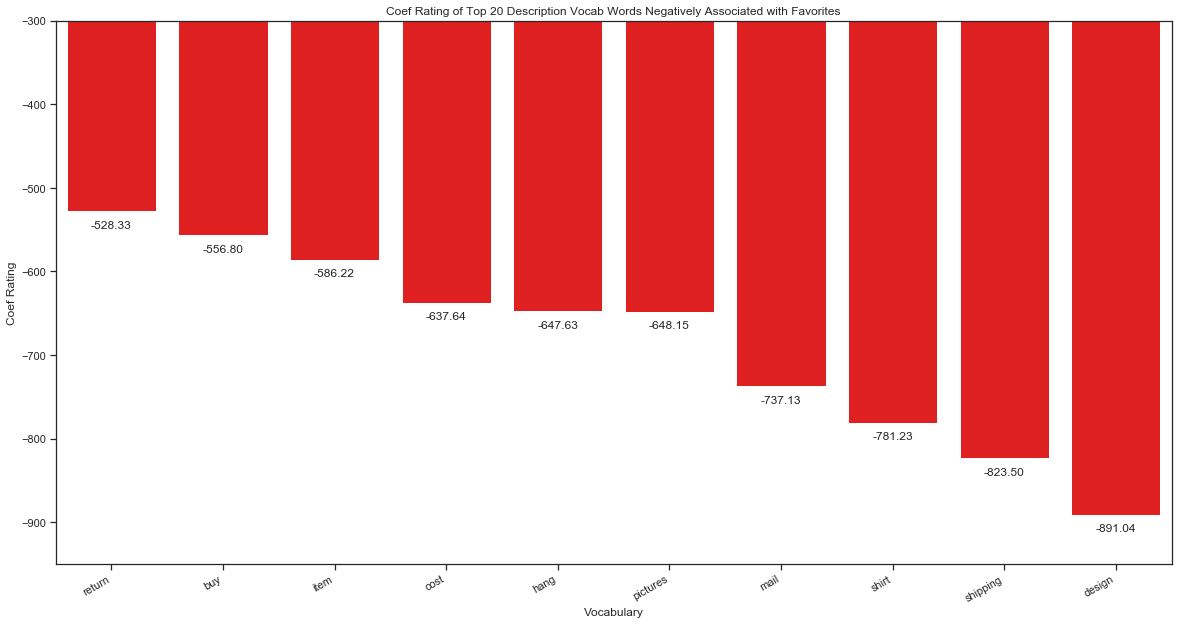

In [100]:
# Set up the matplotlib figure.
f, bx = plt.subplots(figsize=(20, 10))
bx = sns.barplot(data=harmful_desc, x='vocab',
                 y='coef', color='red', saturation=0.75)
bx.set(title='Coef Rating of Top 20 Description Vocab Words Negatively Associated with Favorites',
       xlabel='Vocabulary', ylabel='Coef Rating')
bx.set_xticklabels(bx.get_xticklabels(), rotation=30, ha='right')
plt.ylim(-950, -300)
# Display values


def show_values_on_bars(bxs):
    def _show_on_single_plot(bx):
        for p in bx.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 20
            value = '{:.2f}'.format(p.get_height())
            bx.text(_x, _y, value, ha="center")

    if isinstance(bxs, np.ndarray):
        for idx, bx in np.ndenumerate(bxs):
            _show_on_single_plot(bx)
    else:
        _show_on_single_plot(bxs)


# Show plot
show_values_on_bars(bx)
plt.show()

In [101]:
harmful_msg

,vocab,feature_type,coef


ValueError: min() arg is an empty sequence

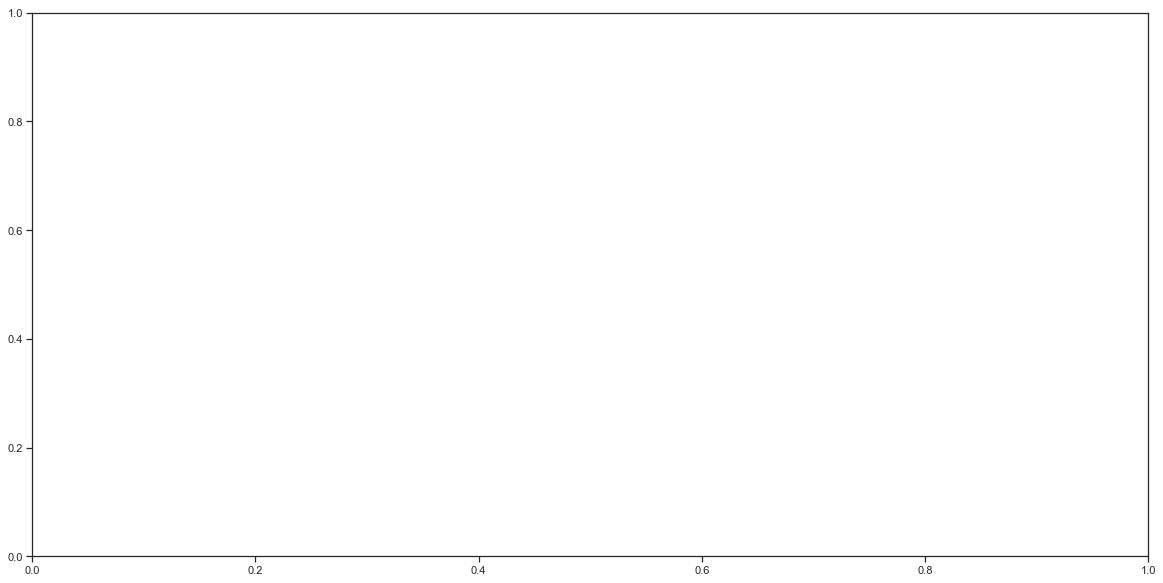

In [102]:
# Set up the matplotlib figure.
f, b1x = plt.subplots(figsize=(20, 10))
b1x = sns.barplot(data=harmful_msg, x='vocab',
                  y='coef', color='red', saturation=0.75)
b1x.set(title='Coef Rating of Top 20 Message Vocab Words Negatively Associated with Favorites',
        xlabel='Message Vocabulary', ylabel='Coef Rating')
b1x.set_xticklabels(b1x.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(b1xs):
    def _show_on_single_plot(b1x):
        for p in b1x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 20
            value = '{:.2f}'.format(p.get_height())
            b1x.text(_x, _y, value, ha="center")

    if isinstance(b1xs, np.ndarray):
        for idx, bx in np.ndenumerate(b1xs):
            _show_on_single_plot(b1x)
    else:
        _show_on_single_plot(b1xs)


# Show plot
show_values_on_bars(b1x)
plt.show()

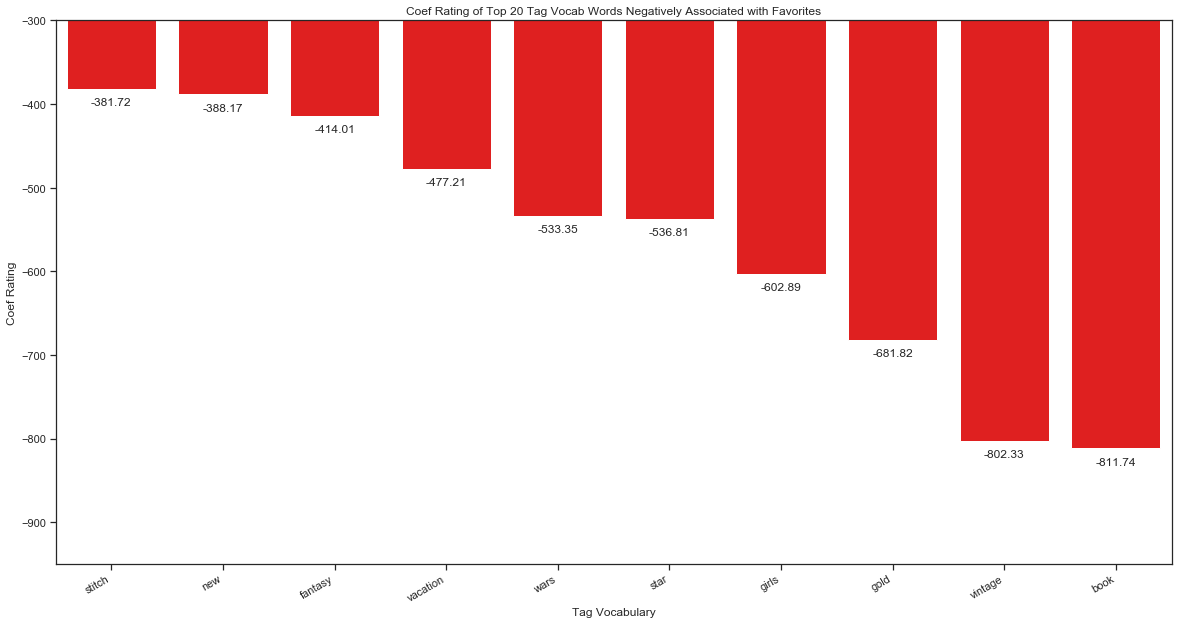

In [103]:
# Set up the matplotlib figure.
f, b2x = plt.subplots(figsize=(20, 10))
b2x = sns.barplot(data=harmful_tag, x='vocab',
                  y='coef', color='red', saturation=0.75)
b2x.set(title='Coef Rating of Top 20 Tag Vocab Words Negatively Associated with Favorites',
        xlabel='Tag Vocabulary', ylabel='Coef Rating')
b2x.set_xticklabels(b2x.get_xticklabels(), rotation=30, ha='right')
plt.ylim(-950, -300)

# Display values


def show_values_on_bars(b2xs):
    def _show_on_single_plot(b2x):
        for p in b2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 20
            value = '{:.2f}'.format(p.get_height())
            b2x.text(_x, _y, value, ha="center")

    if isinstance(b2xs, np.ndarray):
        for idx, bx in np.ndenumerate(b2xs):
            _show_on_single_plot(b2x)
    else:
        _show_on_single_plot(b2xs)


# Show plot
show_values_on_bars(b2x)
plt.show()

# Where I try at the listing level

In [180]:
# Open the listing level files
df_listing_final = pd.read_csv('df_listing_final.csv')
df_listing_final = df_listing_final.drop(['Unnamed: 0'], axis=1)
df_listing_final['style'] = df_listing_final['style'].fillna('')
df_listing_final.shape

(5345, 11)

In [181]:
# Visualize
df_listing_final

,listing_id,num_favorites,user_id,title,description,tags,style,is_digital,is_customizable,price,creation_yr
0,262981963,100,38103717,Up inspired our love is sn adventure 3 button,Our LE Up inspired our love is an adventure 3 button will be available from January 7th-February 4th 2016. This button will take you on s new adventure.,"['balloons', 'Ellie', 'Carl', 'up', 'disney movie', 'party favors', 'disney button', 'Disney trip', 'buttons', 'disney custom button', 'disney bound', 'Disney couples', 'love']",,0,0,5.00,2018
1,591514611,100,103655661,Flower and garden Mickey Mouse ears| flower and garden Mickey ears| flower and garden ears| rose gold ears| rose gold floral ears| flower,"Gorgeous rose gold ears with peach, pink and ivory flowers ✨🌸Very lightweight fits ages 6+(Very comfy for adults)","['Mickey ears', 'Mickey Mouse ears', 'Minnie ears', 'Minnie Mouse ears', 'Mouse ears', 'Disney ears', 'Ears of Disney', 'Floral ears', 'Flower ears', 'Flower headband', 'Floral headband', 'Rose gold', 'Rose gold floral']",,0,1,35.00,2018
2,528942794,100,30837077,Dcl FE gift (2) LED Lanterns great party favor as well.. disney weddings,You get 2Stand about 4 inches tall very cute disney gift orParty favors also do bulk discount,"['Disney shower', 'hidden Mickey', 'DISNEYCRUISE wedding', 'dftw', 'tangled wedding', 'Stateroom magnets', 'disney cruise', 'Dcl', 'disney wedding favor', 'disney wedding', 'fe gift', 'mickey mouse', 'DISNEY']",,0,1,20.00,2018
3,549566703,100,44053694,Black and White Disney Family Shirts - Disney Tank Top - Halloween Shirt - Family matching shirts,"Halloween Special !! ***********************PLEASE ADVISE SIZE IN DROP DOWN MENU choose if you want tank tops or just tshirt :-) ALL SHIRTS ARE UNISEX FIT Tshirts! They will be all Black tshirts and Black women tank tops with WHITE IMAGE ONLY!!!THESE black and white shirts will ONLY be available for HALLOWEEN ONLY!I will let you choose if you want a bow or not and what color bow too!More HALLOWEEN shirts in my shop at this listing below:https://www.etsy.com/listing/547643369/halloween-boo-shirt-halloween-disney?ref=shop_home_feat_2**************************************************************************PLEASE INDICATE AT CHECKOUT IF YOU WANT DW HALLOWEEN 2017 UNDER THE MICKEY SWIRL OR IF YOU JUST WANT IT PLAIN IF YOU DO NOT TELL ME ANYTHING YOU WILL JUST GET THE SWIRL************************************************************************** PLEASE PLEASE LEAVE A DATE TO WHEN YOU NEED THEM BY!!!**************************************************************************2017 Family Shirts, Family Photos for Vacations, Family Photo shoot, Disney Family vacations, Disney clothing matching for the whole family. This all sounds AMAZING!!! These shirts are so popular right now for Babies, Toddlers, Youth, Adults and Adult Tall. *************************************************************************************I also request a date that you are going on your trip so I NEVER MISS ANYONES TRIP (I would be heartbroken if i did) you may also request NO YEAR so you can wear them every year too! :-) All these shirts are made with Love!This image is on the front of the shirts and will be blank on the back .If you would like to continue to shop for more of these shirts you may return to my shop for more images that are available I have HALLOWEEN AND THANKSGIVING and CHRISTMASyou can get to my shop by clicking the following link https://www.etsy.com/shop/DisneyFreakBoutique","['disney family shirts', 'halloween disney', 'mnsshp', 'not so scarey', 'halloween party', 'disney shirt', 'mickey mouse shirt', 'minnie bow', 'black and white', 'disney world', 'halloween costume', 'disney tank top', 'halloween shirt']",,0,0,14.00,2018
4,275137002,100,42828296,Color Changing Monorail Shirt in Gray - Limited Quantities and Sizes! - A Retrocot Original,"LIMITED QUANTITIES AVAILABLE! This vintage style T-Shirt reads: Highway in the SkyThis magic color changing monorail shirt makes the monorail the 

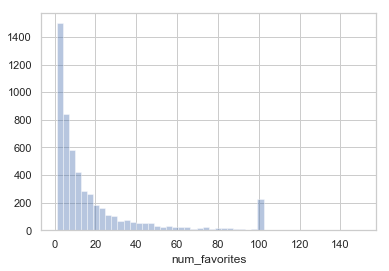

In [182]:
ax = sns.distplot(df_listing_final['num_favorites'], kde=False, rug=False)

There is a gradual drop off in the number of favorites as it increases; however, we have a short burst of increase at 100, which is the max amount of listing favorites I accounted for per listing.

In [183]:
df_listing_final.num_favorites.var()

609.9551225192273

In [184]:
# Creating the matrix.
counter_title = CountVectorizer(lowercase=True,
                                stop_words='english',
                                ngram_range=(1, 1),
                                analyzer=u'word',
                                max_df=.5, # no more than 50%
                                min_df=10, # don't include if count is less than10 times
                                max_features=None,
                                vocabulary=None,
                                binary=False)
# Creating the matrix.
counter_dsc = CountVectorizer(lowercase=True,
                              stop_words='english',
                              ngram_range=(1, 1),
                              analyzer=u'word',
                              max_df=.5,
                              min_df=10,
                              max_features=None,
                              vocabulary=None,
                              binary=False)
# Creating the matrix.
counter_tag = CountVectorizer(lowercase=True,
                              stop_words='english',
                              ngram_range=(1, 1),
                              analyzer=u'word',
                              max_df=.5,
                              min_df=10,
                              max_features=None,
                              vocabulary=None,
                              binary=False)

In [185]:
# Vectorizer applied to all shops' titles
title_list = df_listing_final['title'].fillna('').values.tolist()
# Applying the vectorizer
title_data_counts = counter_title.fit_transform(title_list)
feature_title = counter_title.get_feature_names()

# Vectorizer applied to all shops' descriptions
dsc_list = df_listing_final['description'].fillna('').values.tolist()
# Clean just in case
dsc_list = [d.replace('\r', '').replace(
    '\n', '').replace('1&quot;', '') for d in dsc_list]
# Applying the vectorizer
dsc_data_counts = counter_dsc.fit_transform(dsc_list)
feature_dsc = counter_dsc.get_feature_names()

# Vectorizer applied to all shops' tags
tag_list = df_listing_final['tags'].fillna('').values.tolist()
# Applying the vectorizer
tag_data_counts = counter_tag.fit_transform(tag_list)
feature_tag = counter_tag.get_feature_names()

# Add listing prices
price_list = df_listing_final['price'].values

# Add listing digital info
dig_list = df_listing_final['is_digital'].values

# Add listing customizable info
custom_list = df_listing_final['is_customizable'].values

In [186]:
# Verify all the lists have the same amount of rows and that there is at least one column
print(title_data_counts.shape)
print(dsc_data_counts.shape)
print(tag_data_counts.shape)
price_list.shape = (len(price_list), 1)
print(price_list.shape)
dig_list.shape = (len(dig_list), 1)
print(dig_list.shape)
custom_list.shape = (len(custom_list), 1)
print(custom_list.shape)

(5345, 672)
(5345, 2169)
(5345, 742)
(5345, 1)
(5345, 1)
(5345, 1)


In [187]:
# Set X Matrix equal to all the things we just put through the vectorizer, plus the price info
X_listing_matrix = np.concatenate((title_data_counts.toarray(), dsc_data_counts.toarray(
), tag_data_counts.toarray(), price_list, dig_list, custom_list), axis=1)
X_listing_matrix.shape

(5345, 3586)

In [188]:
# Set the y value
y_listing = df_listing_final['num_favorites'].values

In [193]:
# Run a lasso regression on the listing level data
lasso2 = Lasso(alpha=.35)
listing_err = []
listing_err_dumb = []
for train, test in kf.split(X_listing_matrix):
    print(" ")
    X_train_list = X_listing_matrix[train]
    y_train_list = y_listing[train]
    X_test_list = X_listing_matrix[test]
    lasso2.fit(X_train_list, y_train_list)
    y_test_list = y_listing[test]
    y_pred_list = lasso2.predict(X_test_list)
    listing_err.append(np.mean(np.abs(y_pred_list - y_test_list)))
    y_pred_dumb_list = np.array([np.mean(y_train_list)]*len(y_test_list))
    print(y_pred_dumb_list)
    print(y_test_list)
    listing_err_dumb.append(np.mean(np.abs(y_pred_dumb_list - y_test_list)))
    rms = sqrt(mean_squared_error(y_test_list, y_pred_list))
    print(rms)

 
[11.55706268 11.55706268 11.55706268 ... 11.55706268 11.55706268
 11.55706268]
[100 100 100 ...  13  13  13]
44.8564355409512
 
[20.95182413 20.95182413 20.95182413 ... 20.95182413 20.95182413
 20.95182413]
[13 13 13 ...  2  2  2]
17.48230204474611
 
[20.27666043 20.27666043 20.27666043 ... 20.27666043 20.27666043
 20.27666043]
[  2   2   2 ... 106 104 104]
21.108370597110525
 
[15.5313377 15.5313377 15.5313377 ... 15.5313377 15.5313377 15.5313377]
[102 100 100 ...   8   8   8]
28.898709251978172
 
[21.50444341 21.50444341 21.50444341 ... 21.50444341 21.50444341
 21.50444341]
[ 8  8  8 ...  1  1 16]
19.239920039252695


In [194]:
# Calculate the error
print(listing_err)
print()
print(listing_err_dumb)
print()
print(np.mean(listing_err))
print()
print(np.mean(listing_err_dumb))
print()
print(np.mean(rms))

[33.5868955171525, 15.083267141874583, 15.082982953659796, 17.70374401123572, 18.46213255510679]

[32.03601496725913, 14.937792329279702, 18.583914528059672, 15.570345855345082, 17.700888681010294]

19.983804435805876

19.765791272190775

19.239920039252695


In [195]:
# Run a lasso regression on the listing level data
ridgeregr_list = linear_model.Ridge(alpha=0.35)
listing_err = []
listing_err_dumb = []
for train, test in kf.split(X_listing_matrix):
    print(" ")
    X_train_list = X_listing_matrix[train]
    y_train_list = y_listing[train]
    X_test_list = X_listing_matrix[test]
    ridgeregr_list.fit(X_train_list, y_train_list)
    y_test_list = y_listing[test]
    y_pred_list = ridgeregr_list.predict(X_test_list)
    listing_err.append(np.mean(np.abs(y_pred_list - y_test_list)))
    y_pred_dumb_list = np.array([np.mean(y_train_list)]*len(y_test_list))
    print(y_pred_dumb_list)
    print(y_test_list)
    listing_err_dumb.append(np.mean(np.abs(y_pred_dumb_list - y_test_list)))
    rms = sqrt(mean_squared_error(y_test_list, y_pred_list))

 
[11.55706268 11.55706268 11.55706268 ... 11.55706268 11.55706268
 11.55706268]
[100 100 100 ...  13  13  13]
 
[20.95182413 20.95182413 20.95182413 ... 20.95182413 20.95182413
 20.95182413]
[13 13 13 ...  2  2  2]
 
[20.27666043 20.27666043 20.27666043 ... 20.27666043 20.27666043
 20.27666043]
[  2   2   2 ... 106 104 104]
 
[15.5313377 15.5313377 15.5313377 ... 15.5313377 15.5313377 15.5313377]
[102 100 100 ...   8   8   8]
 
[21.50444341 21.50444341 21.50444341 ... 21.50444341 21.50444341
 21.50444341]
[ 8  8  8 ...  1  1 16]


In [196]:
# Calculate the error
print(listing_err)
print()
print(listing_err_dumb)
print()
print(np.mean(listing_err))
print()
print(np.mean(listing_err_dumb))
print()
print(np.mean(rms))

[39.411597950883305, 24.666824579542745, 36.33465872610858, 27.51786831759819, 27.99403897080154]

[32.03601496725913, 14.937792329279702, 18.583914528059672, 15.570345855345082, 17.700888681010294]

31.184997708986874

19.765791272190775

39.305561595840274


In [197]:
# Create a vocab list and calc coef
np.mean(lasso2.coef_[0:-3] > 0)  # price, digital, customizable is out
feature_type2 = ['description'] * \
    len(feature_dsc) + ['title'] * \
    len(feature_title) + ['tag'] * len(feature_tag)
vocab2 = feature_dsc + feature_title + feature_tag
temp_df2 = pd.DataFrame({'vocab': vocab2, 'coef': lasso2.coef_[
                        0:-3], 'feature_type': feature_type2})
# These are the words that have an influence on whether ppl fav the shop or not
influential_words2 = temp_df2[temp_df2['coef'] != 0]

In [198]:
# Sort the influential words
influential_words2 = pd.DataFrame(influential_words2.drop_duplicates().groupby(
    ['vocab', 'feature_type'])['coef'].mean().sort_values(ascending=False)).reset_index()
influential_words2

,vocab,feature_type,coef
0,button,tag,8.442723
1,shopping,description,4.436858
2,girls,title,3.853858
3,sea,description,3.406618
4,pin,tag,3.178023
5,given,description,2.837131
6,minnie,tag,2.796481
7,shirts,tag,2.180832
8,35,title,1.994984
9,warn,description,1.741472


In [95]:
# Create a vocab list and calc coef
np.mean(ridgeregr_list.coef_[0:-3] > 0)  # price, digital, customizable is out
feature_type2 = ['title'] * \
    len(feature_title) + ['description'] * \
    len(feature_dsc) + ['tag'] * len(feature_tag)
vocab2 = feature_title + feature_dsc + feature_tag
temp_df2 = pd.DataFrame({'vocab': vocab2, 'coef': ridgeregr_list.coef_[
                        0:-3], 'feature_type': feature_type2})
# These are the words that have an influence on whether ppl fav the shop or not
influential_words2 = temp_df2[temp_df2['coef'] != 0]
# Group by the vocab's feature type
temp_df2.groupby('feature_type').agg('count')

,coef,vocab
feature_type,,
description,2169,2169
tag,742,742
title,672,672


Again we see that a majority of the influential words are from the descritpions. This shows that shop owners really do have power in influencing their customers through their choice of words and the qualities of their products.  

In [96]:
# Sort the influential words
influential_words2 = pd.DataFrame(influential_words2.drop_duplicates().groupby(
    ['vocab', 'feature_type'])['coef'].mean().sort_values(ascending=False)).reset_index()
influential_words2

,vocab,feature_type,coef
0,premium,description,42.887438
1,tiki,description,39.300993
2,make,tag,39.188491
3,stripes,title,36.557238
4,favors,title,34.300173
5,1982,title,33.972068
6,important,description,31.812036
7,seas,description,31.784687
8,mid,description,31.512953
9,cross,description,31.459474


Ridge Regression works the best at the listing level also! The lasso has a tiny bit more accuracy, but it does so by making a majority of the coefficients 0. So, we will go with ridge regression for the listing level also, to determine the influential words and make predicitons off of.

In [97]:
# Identify the top 20 descriptions, tags, and messages positively associated with being favorited

beneficial_desc2 = influential_words2[influential_words2['feature_type'] == 'description'].head(
    10)
beneficial_tag2 = influential_words2.loc[influential_words2['feature_type'] == 'tag'].head(
    10)
beneficial_title2 = influential_words2.loc[influential_words2['feature_type'] == 'title'].head(
    10)

# Identify the top 20 words negatively
harmful_desc2 = influential_words2.loc[influential_words2['feature_type']
                                       == 'description'].tail(10)
harmful_tag2 = influential_words2.loc[influential_words2['feature_type']
                                      == 'tag'].tail(10)
harmful_title2 = influential_words2.loc[influential_words2['feature_type']
                                        == 'title'].tail(10)

In [162]:
harmful_title2['vocab'].tolist()

['years',
 'painting',
 'crown',
 'boho',
 'youth',
 'add',
 'spider',
 'retrocot',
 'card',
 'instant']

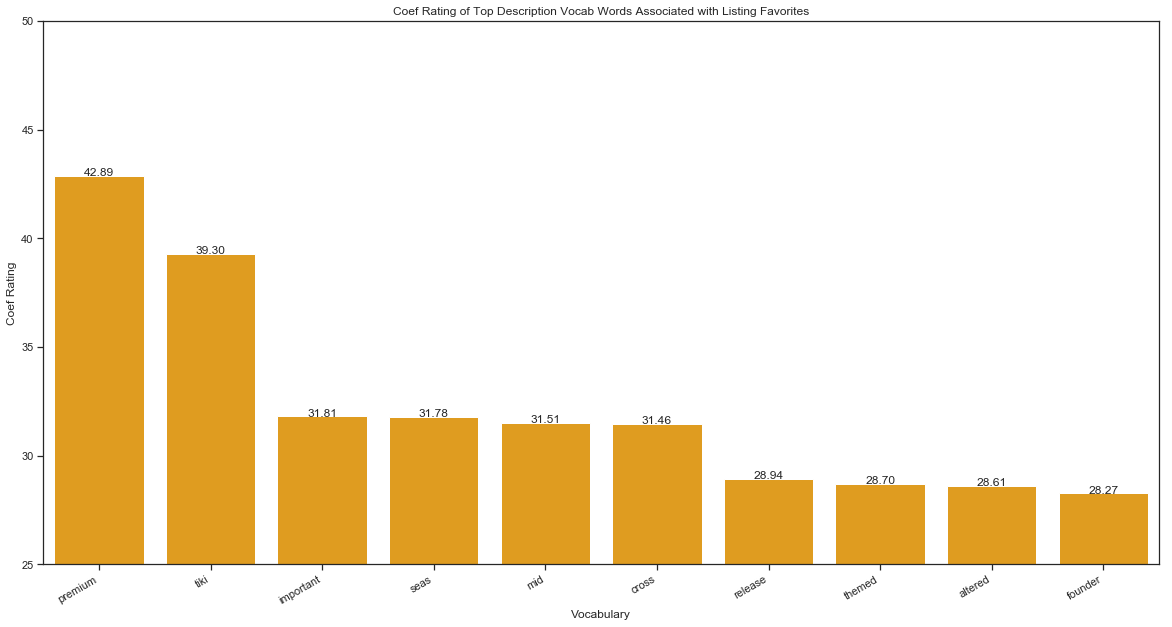

In [109]:
# Set up the matplotlib figure.
f, cx = plt.subplots(figsize=(20, 10))
cx = sns.barplot(data=beneficial_desc2, x='vocab',
                 y='coef', color='orange', saturation=0.75)
cx.set(title='Coef Rating of Top Description Vocab Words Associated with Listing Favorites',
       xlabel='Vocabulary', ylabel='Coef Rating')
cx.set_xticklabels(cx.get_xticklabels(), rotation=30, ha='right')
plt.ylim(25, 50)
# Display values


def show_values_on_bars(cxs):
    def _show_on_single_plot(cx):
        for p in cx.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            cx.text(_x, _y, value, ha="center")

    if isinstance(cxs, np.ndarray):
        for idx, bx in np.ndenumerate(cxs):
            _show_on_single_plot(cx)
    else:
        _show_on_single_plot(cxs)


# Show plot
show_values_on_bars(cx)
plt.show()

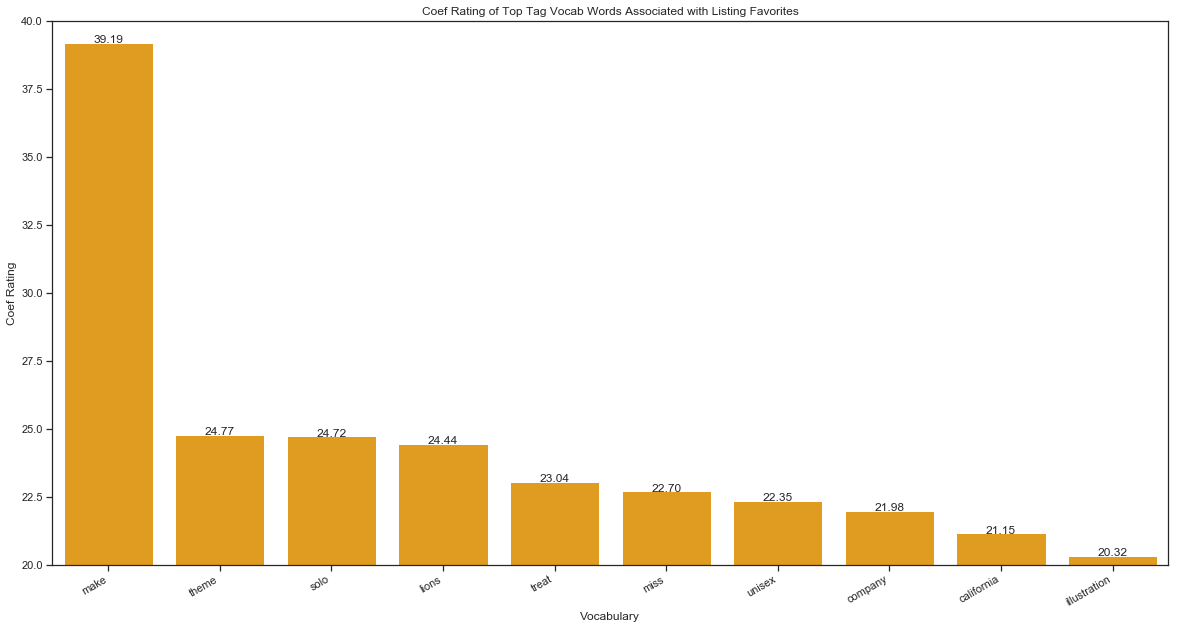

In [110]:
# Set up the matplotlib figure.
f, cx = plt.subplots(figsize=(20, 10))
cx = sns.barplot(data=beneficial_tag2, x='vocab',
                 y='coef', color='orange', saturation=0.75)
cx.set(title='Coef Rating of Top Tag Vocab Words Associated with Listing Favorites',
       xlabel='Vocabulary', ylabel='Coef Rating')
cx.set_xticklabels(cx.get_xticklabels(), rotation=30, ha='right')
plt.ylim(20, 40)
# Display values
# Show plot
show_values_on_bars(cx)
plt.show()

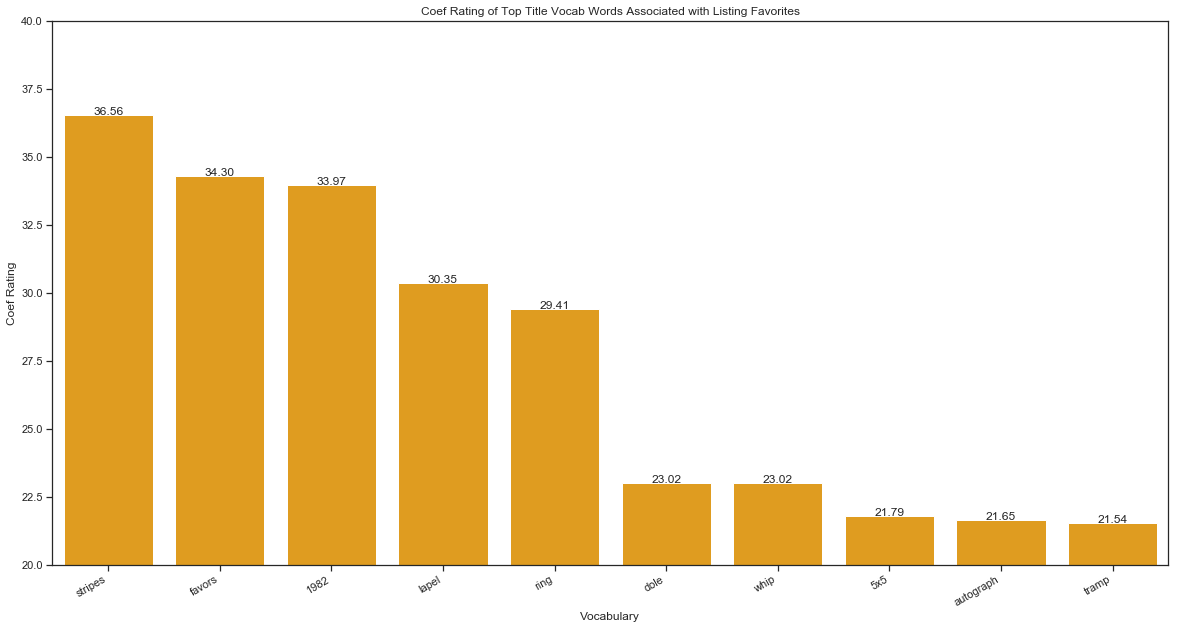

In [111]:
# Set up the matplotlib figure.
f, cx = plt.subplots(figsize=(20, 10))
cx = sns.barplot(data=beneficial_title2, x='vocab',
                 y='coef', color='orange', saturation=0.75)
cx.set(title='Coef Rating of Top Title Vocab Words Associated with Listing Favorites',
       xlabel='Vocabulary', ylabel='Coef Rating')
cx.set_xticklabels(cx.get_xticklabels(), rotation=30, ha='right')
plt.ylim(20, 40)
# Display values
# Show plot
show_values_on_bars(cx)
plt.show()

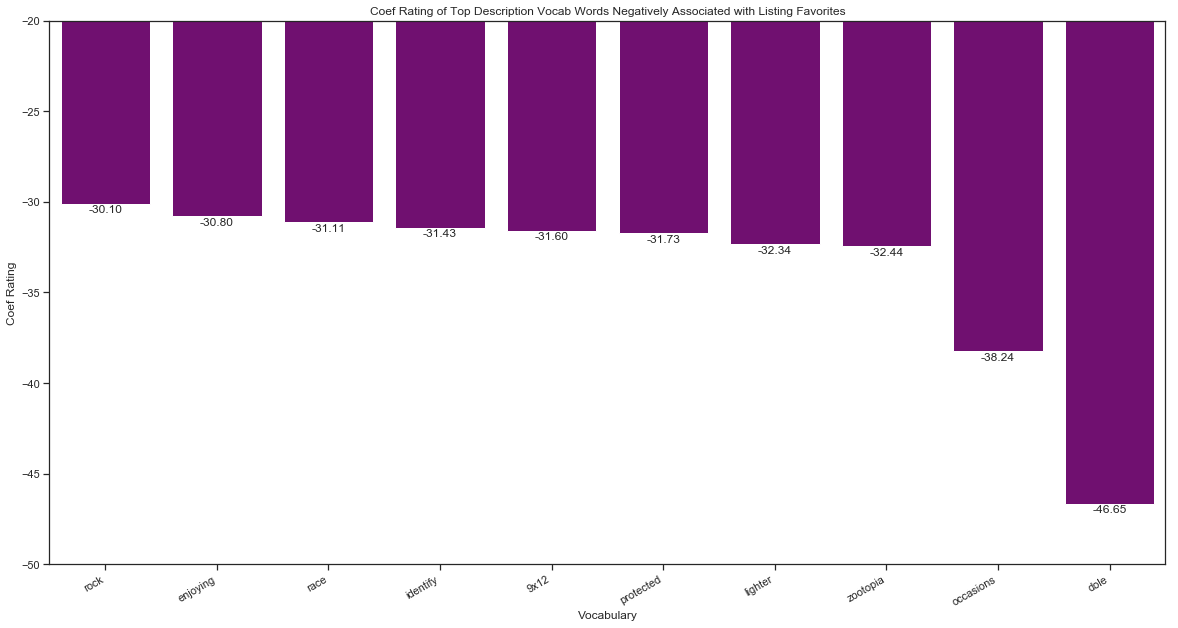

In [114]:
# Set up the matplotlib figure.
f, c2x = plt.subplots(figsize=(20, 10))
c2x = sns.barplot(data=harmful_desc2, x='vocab', y='coef',
                  color='Purple', saturation=0.75)
c2x.set(title='Coef Rating of Top Description Vocab Words Negatively Associated with Listing Favorites',
        xlabel='Vocabulary', ylabel='Coef Rating')
c2x.set_xticklabels(c2x.get_xticklabels(), rotation=30, ha='right')
plt.ylim(-50, -20)


def show_values_on_bars(c2xs):
    def _show_on_single_plot(c2x):
        for p in c2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 0.5
            value = '{:.2f}'.format(p.get_height())
            c2x.text(_x, _y, value, ha="center")

    if isinstance(c2xs, np.ndarray):
        for idx, c2x in np.ndenumerate(c2xs):
            _show_on_single_plot(c2x)
    else:
        _show_on_single_plot(c2xs)


# Display values
# Show plot
show_values_on_bars(c2x)
plt.show()

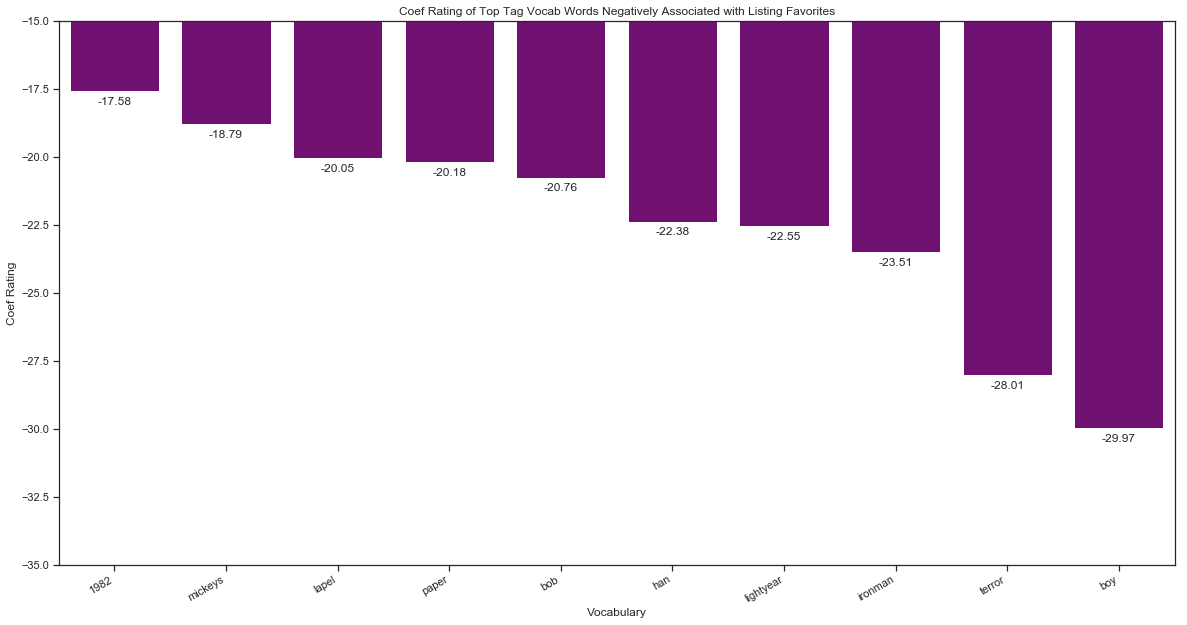

In [116]:
# Set up the matplotlib figure.
f, c2x = plt.subplots(figsize=(20, 10))
c2x = sns.barplot(data=harmful_tag2, x='vocab', y='coef',
                  color='Purple', saturation=0.75)
c2x.set(title='Coef Rating of Top Tag Vocab Words Negatively Associated with Listing Favorites',
        xlabel='Vocabulary', ylabel='Coef Rating')
c2x.set_xticklabels(c2x.get_xticklabels(), rotation=30, ha='right')
plt.ylim(-35, -15)
# Display values
# Show plot
show_values_on_bars(c2x)
plt.show()

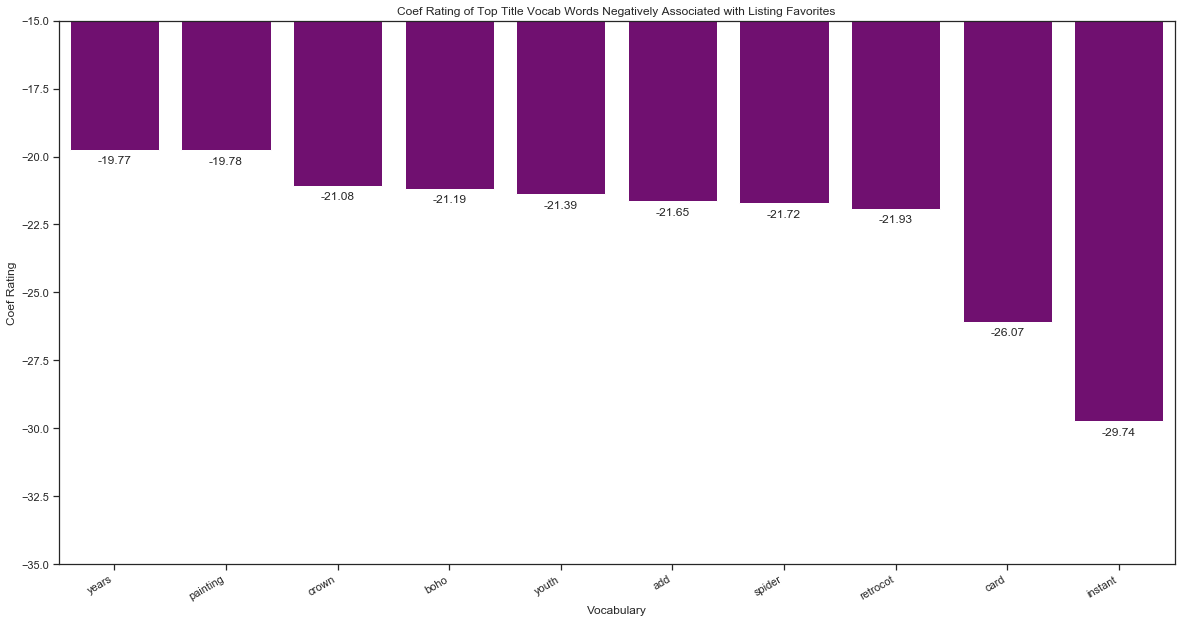

In [117]:
# Set up the matplotlib figure.
f, c2x = plt.subplots(figsize=(20, 10))
c2x = sns.barplot(data=harmful_title2, x='vocab', y='coef',
                  color='Purple', saturation=0.75)
c2x.set(title='Coef Rating of Top Title Vocab Words Negatively Associated with Listing Favorites',
        xlabel='Vocabulary', ylabel='Coef Rating')
c2x.set_xticklabels(c2x.get_xticklabels(), rotation=30, ha='right')
plt.ylim(-35, -15)
# Display values
# Show plot
show_values_on_bars(c2x)
plt.show()

In the above analysis, we determined the top influential words for each category, and graphed them in a barplot for easier comprehension.  

# Predictions

I plan to define a set of words in a for loop to predict how many favorites a shop is likely to get for different prices, tags or descriptions.

It would be interesting to take an existing shop's listing title, description and tags, spiff it up accodring to the influential vocab identified by the ridge regression model, and see how the number of favorites changes accordingly.  

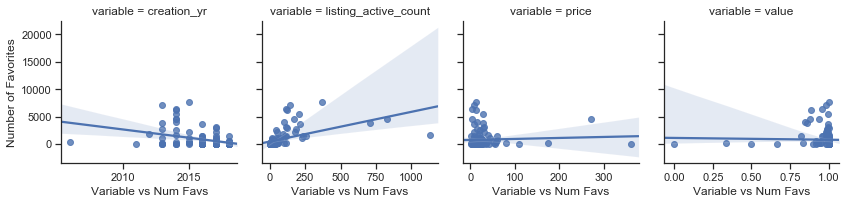

In [42]:
# Melt the data to visualize num fav compared to other variables
final_df_melt = pd.melt(final_df.drop(
    ['user_id', 'title', 'description', 'tags', 'message'], axis=1), id_vars=['shop_name', 'num_favorites'])
df_melt_grouped = final_df_melt.groupby(['variable', 'value', 'shop_name'])[
    'num_favorites'].mean().reset_index()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  # Setting the overall aesthetic
cx = sns.FacetGrid(df_melt_grouped, col="variable",
                   col_wrap=4, sharex=False)
cx = cx.map(sns.regplot, "value", 'num_favorites')
cx.set_ylabels("Number of Favorites")
cx.set_xlabels("Variable vs Num Favs")
plt.show()

It seems:   
as time increases since creation, the number of favorites decrease  
as the number of listings per shop increases, the number of favorites increases  
as the price increases, the number of favorites slightly increases  
as the rating value of the shop increases, the number of favorites slightly decreases

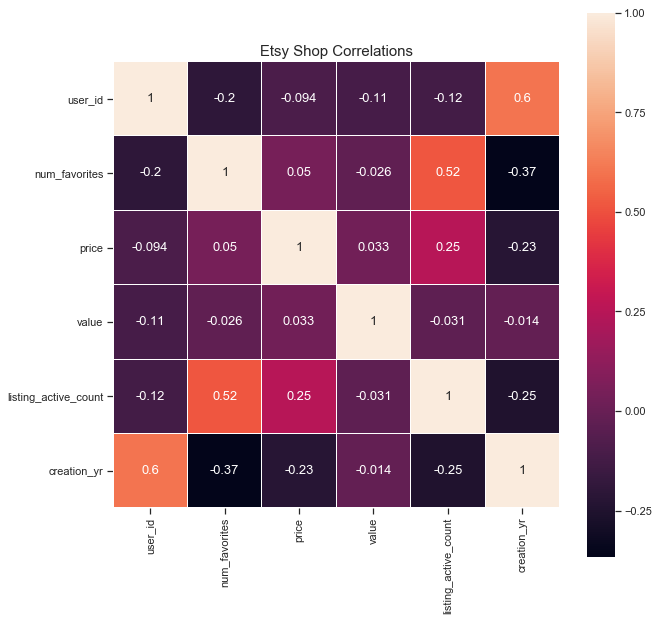

In [37]:
# Make the correlation matrix.
corrmat = final_df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap using seaborn.
fig = sns.heatmap(corrmat, linewidths=0.1, vmax=1.0,
                  square=True, linecolor='white', annot=True, annot_kws={"size": 13})
plt.title('Etsy Shop Correlations', size=15)
# figure = fig.get_figure()
# figure.savefig('output.png')

plt.show()

It seems like the strongest correlation is between the number of favorites and listing active count at 0.52.

In [118]:
# Choose a random listing
df_listing_final.loc[200:200, :]

,listing_id,num_favorites,user_id,title,description,tags,style,is_digital,is_customizable,price,creation_yr
200,231009439,80,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,0,1,5.0,2018


In [119]:
# Select listing
listing = X_listing_matrix[200:201, :]
# Set different prices to try
prices = [5, 10, 13.5, 50, 150, 500]

# Create tiles for listing info and predict favorites
Listing = np.tile(listing, (len(prices), 1))
Listing[:, -3] = prices
predicted_favs = ridgeregr_list.predict(Listing)

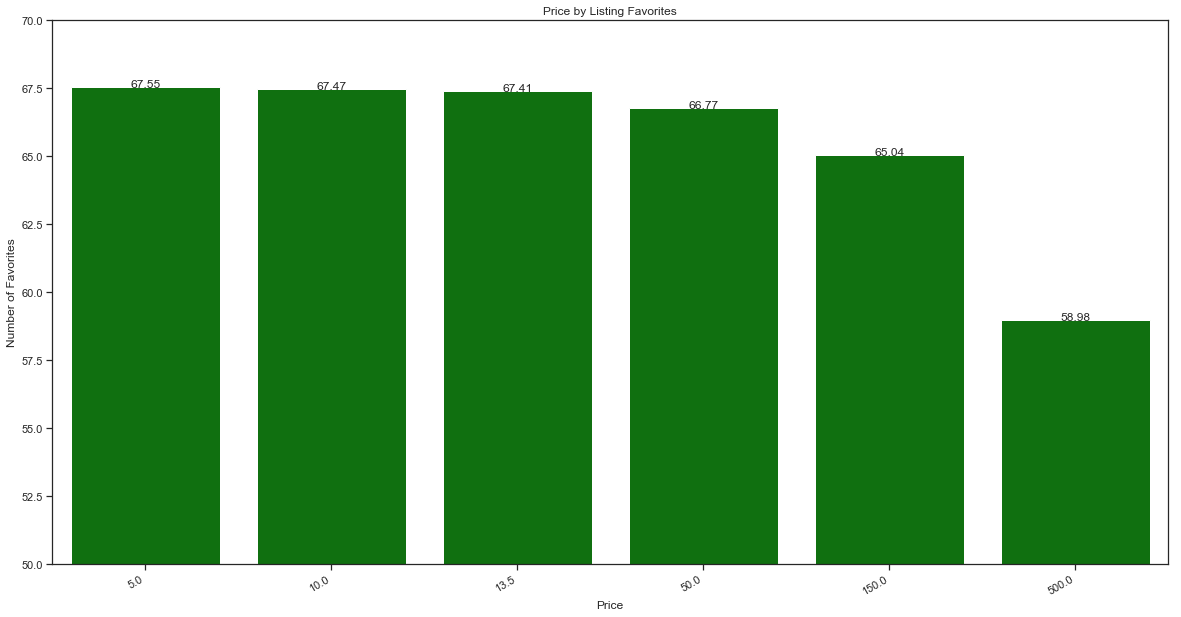

In [135]:
# Set up the matplotlib figure.
f, px = plt.subplots(figsize=(20, 10))
px = sns.barplot(x=prices, y=predicted_favs, color='green', saturation=0.75)
px.set(title='Price by Listing Favorites',
       xlabel='Price', ylabel='Number of Favorites')
px.set_xticklabels(px.get_xticklabels(), rotation=30, ha='right')
# zoom in on y axis
plt.ylim(50, 70)
# Display values


def show_values_on_bars(pxs):
    def _show_on_single_plot(px):
        for p in px.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            px.text(_x, _y, value, ha="center")

    if isinstance(pxs, np.ndarray):
        for idx, x in np.ndenumerate(pxs):
            _show_on_single_plot(px)
    else:
        _show_on_single_plot(pxs)


# Show plot
show_values_on_bars(px)
plt.show()

This array shows us that as the price increases, the number of favorites slightly decreases. The shallowness of how the number of favorites changes shows how the number of favorites is not greatly affected by the price.  
This is perhaps because you can favorite an item on Etsy even if you do not buy it! So, price is not necessarily a deterrence. 

Let's check out the shop level now. If I play around with the information such as average shop item price, number of active listings per shop, or creation year, how does it change?

In [105]:
final_df.loc[0:0, :]

user_id      shop_name  num_favorites  \
0  20413    DisneyObscura  355.0           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        title  \
0  Moana toddler baby with Stitch crossover mashup 16x20 custom painted Disney canvas painting Native Shell Flower Gift Friends One Of A Kind Lilo and Stitch with Scrump and Pleakly.  9 x 12 inch wrapped canvas to hang or frame. Fun in a Coin Operated Space Ship! DisneyObscura Custom Disney or Pixar themed painting, your choice. Favorite characters, scenes. Small or large. Princess, Villain, rare, obscure. Mashups Disney's Lilo and Stitch - Fat man and Stitch enjoy their ice cream. Well, maybe Stitch does. Disney painting 6x6 acrylic Queen Grimhilde magic mirror Snow White, Yzma Emperors New Groove mashup custom painted Disney canvas 16 x 20 acrylic by DisneyObscura Maleficent Sleeping Beauty, ravens and, Queen Grimhilde Evil Wicked Hag Snow White mashup custom painted Disney wrapped canvas DisneyObscura Stitch and Queen Grimhilde Evil Wicked Hag Snow White mashup custom painted Disney wrapped canvas 12 x 24 acrylic DisneyObscura Tipo and Chaca from the classic and funny Disney movie The Emperor's New Groove. 5 x 4 wrapped canvas painting ooak Be nice to Mermaids!  Ariel, the Little Mermaid and Flounder giving Disney's Villain Ursula the eye.  10 x 12 wrapped canvas ooak painting Maleficent and Diablo from Disney's Sleeping Beauty. Plotting and sly. One Of A Kind 16 x 20 portrait by Disney Obscura. Blowing Bubbles After The Bath. Dumbo the Elephant is blowing some funky bubbles! One of a kind Disney Painting 8 x 10 by Disney Obscura Yzma talking eyeball from Disney's The Emperors New Groove.  Hilarious scene with Chaca. OOAK 10 x 12 Hercules VS The Lightning Bolt Disney's cute baby 

In [136]:
# In X_matrix, -3 is price, -2 is number of active listings per shop, -1 is creation yr
ridgeregr.predict(X_matrix[0:1, :])

array([840.39758628])

In [137]:
# Select
shop = X_matrix[0:1, :]
# Set different prices to try
avg_prices = [5, 10, 13.5, 20, 35, 50, 57, 70]

# Create tiles for listing info and predict favorites
Shop = np.tile(shop, (len(avg_prices), 1))
Shop[:, -3] = avg_prices
pred_favs = ridgeregr.predict(Shop)

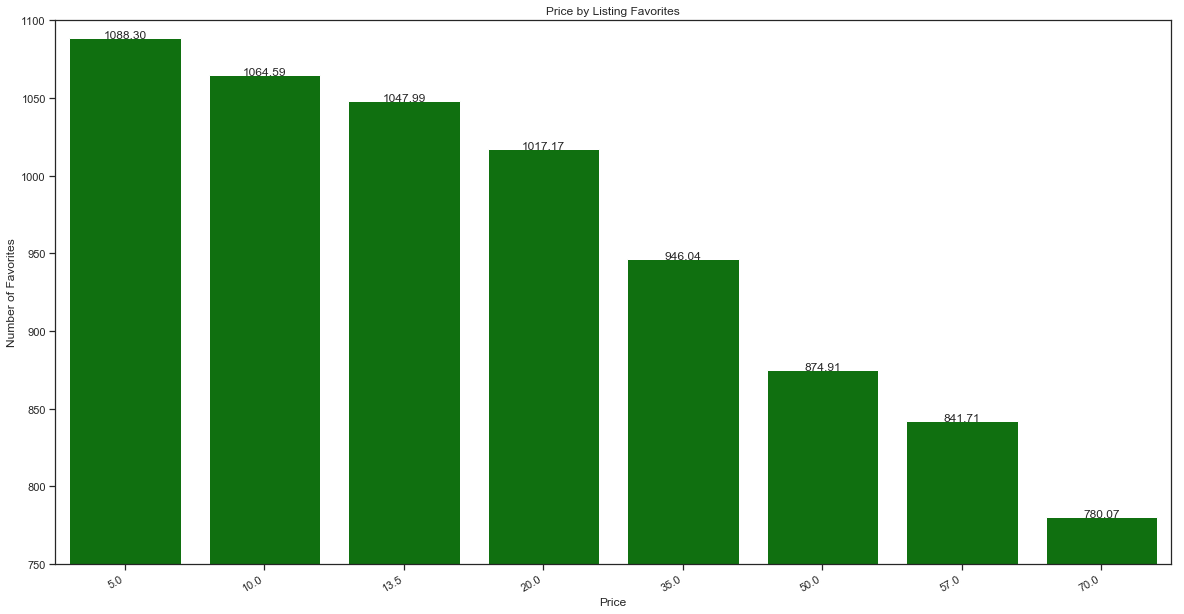

In [138]:
# Set up the matplotlib figure.
f, p2x = plt.subplots(figsize=(20, 10))
p2x = sns.barplot(x=avg_prices, y=pred_favs, color='green', saturation=0.75)
p2x.set(title='Price by Listing Favorites',
        xlabel='Price', ylabel='Number of Favorites')
p2x.set_xticklabels(p2x.get_xticklabels(), rotation=30, ha='right')
# zoom in on y axis
plt.ylim(750, 1100)
# Display values


def show_values_on_bars(p2xs):
    def _show_on_single_plot(p2x):
        for p in p2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            p2x.text(_x, _y, value, ha="center")

    if isinstance(p2xs, np.ndarray):
        for idx, x in np.ndenumerate(p2xs):
            _show_on_single_plot(p2x)
    else:
        _show_on_single_plot(p2xs)


# Show plot
show_values_on_bars(p2x)
plt.show()

In [139]:
# If the numer of active listings is in num_lists, what does my lasso predict for the number of favs the shop will get?
# Select
shop = X_matrix[0:1, :]
# Set different prices to try
num_lists = [5, 13, 18, 20, 50]

# Create tiles for listing info and predict favorites
Shop = np.tile(shop, (len(num_lists), 1))
Shop[:, -2] = num_lists
pred_favs2 = ridgeregr.predict(Shop)

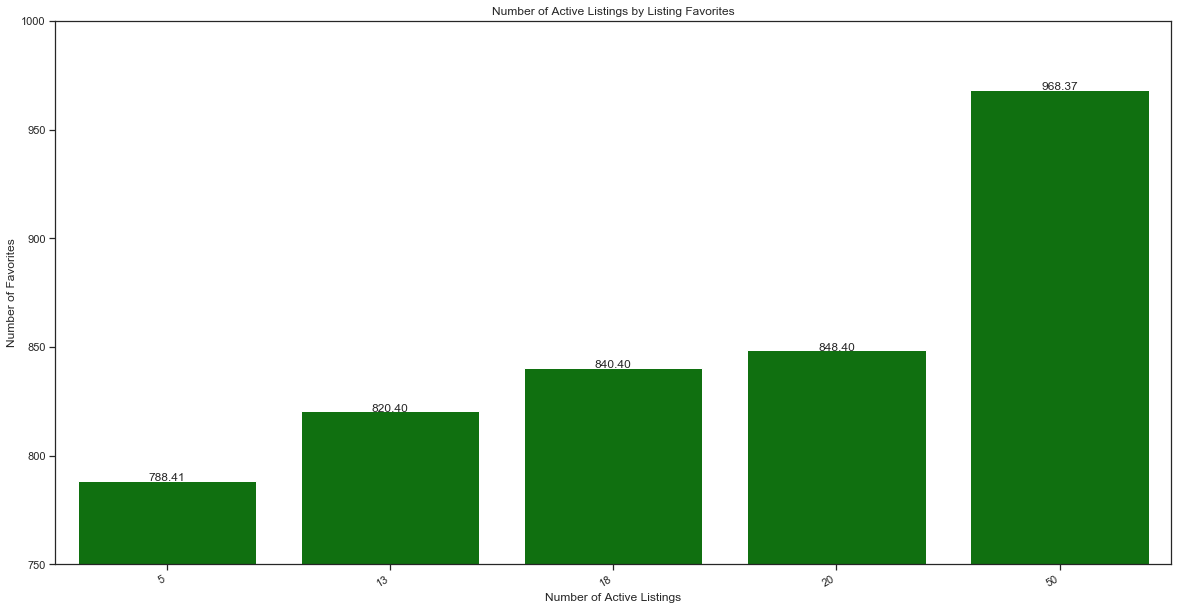

In [170]:
# Set up the matplotlib figure.
f, l2x = plt.subplots(figsize=(20, 10))
l2x = sns.barplot(x=num_lists, y=pred_favs2, color='green', saturation=0.75)
l2x.set(title='Number of Active Listings by Listing Favorites',
        xlabel='Number of Active Listings', ylabel='Number of Favorites')
l2x.set_xticklabels(l2x.get_xticklabels(), rotation=30, ha='right')
# zoom in on y axis
plt.ylim(750, 1000)
# Display values


def show_values_on_bars(l2xs):
    def _show_on_single_plot(l2x):
        for p in l2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            l2x.text(_x, _y, value, ha="center")

    if isinstance(l2xs, np.ndarray):
        for idx, bx in np.ndenumerate(l2xs):
            _show_on_single_plot(l2x)
    else:
        _show_on_single_plot(l2xs)


# Show plot
show_values_on_bars(l2x)
plt.show()

In [141]:
# If the year of my shop creation is in yrs, what does my lasso predict for the number of favs the shop will get?
# Select
shop = X_matrix[0:1, :]
# Set different prices to try
yrs = [1994, 2000, 2006, 2012, 2025]

# Create tiles for listing info and predict favorites
Shop = np.tile(shop, (len(yrs), 1))
Shop[:, -2] = yrs
pred_favs3 = ridgeregr.predict(Shop)

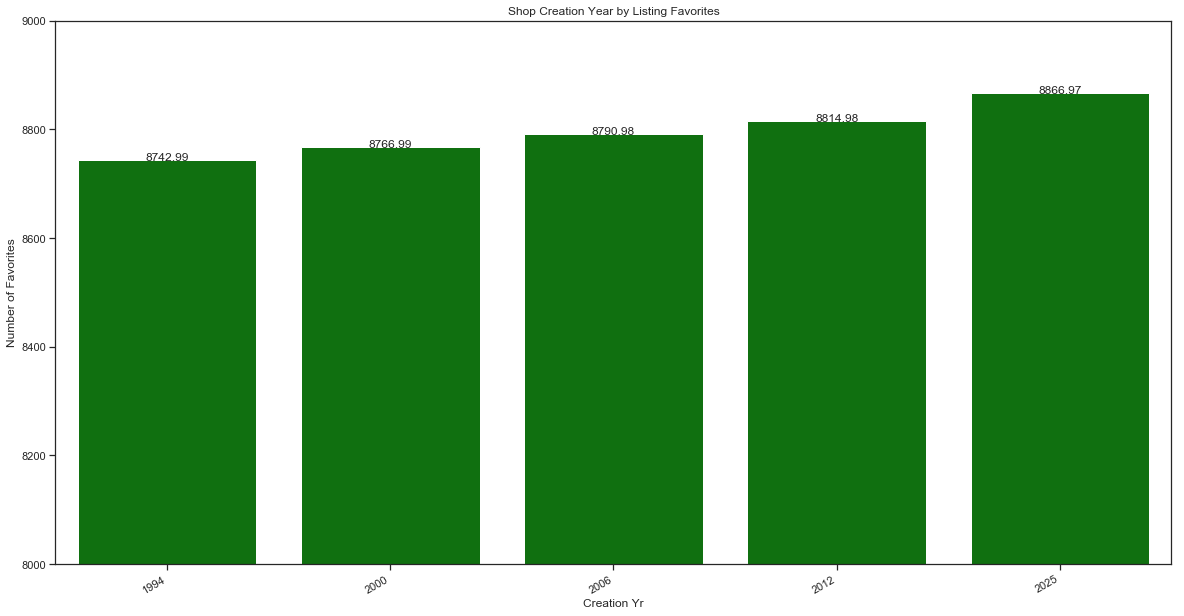

In [175]:
# Set up the matplotlib figure.
f, c2x = plt.subplots(figsize=(20, 10))
c2x = sns.barplot(x=yrs, y=pred_favs3, color='green', saturation=0.75)
c2x.set(title='Shop Creation Year by Listing Favorites',
        xlabel='Creation Yr', ylabel='Number of Favorites')
c2x.set_xticklabels(c2x.get_xticklabels(), rotation=30, ha='right')
# zoom in on y axis
plt.ylim(8000, 9000)
# Display values


def show_values_on_bars(c2xs):
    def _show_on_single_plot(c2x):
        for p in c2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            c2x.text(_x, _y, value, ha="center")

    if isinstance(c2xs, np.ndarray):
        for idx, bx in np.ndenumerate(c2xs):
            _show_on_single_plot(c2x)
    else:
        _show_on_single_plot(c2xs)


# Show plot
show_values_on_bars(c2x)
plt.show()

In [143]:
# Create generic function so that can pass through anything and predict num of favs
def pred_fav(df, counter_title, counter_dsc, counter_tag, predictor):
    # TFIDF Vectorizer applied to all shops' titles
    title_list = df['title'].fillna('').values.tolist()
    # Applying the vectorizer
    title_data_counts = counter_title.transform(title_list)
    feature_title = counter_title.get_feature_names()

    # TFIDF Vectorizer applied to all shops' descriptions
    dsc_list = df['description'].fillna('').values.tolist()
    # Clean just in case
    dsc_list = [d.replace('\r', '').replace(
        '\n', '').replace('1&quot;', '') for d in dsc_list]
    # Applying the vectorizer
    dsc_data_counts = counter_dsc.transform(dsc_list)
    feature_dsc = counter_dsc.get_feature_names()

    # TFIDF Vectorizer applied to all shops' tags
    tag_list = df['tags'].fillna('').values.tolist()
    # Applying the vectorizer
    tag_data_counts = counter_tag.transform(tag_list)
    feature_tag = counter_tag.get_feature_names()

    # Add listing prices
    price_list = df['price'].values

    # Add listing digital info
    dig_list = df['is_digital'].values

    # Add listing customizable info
    custom_list = df['is_customizable'].values

    price_list.shape = (len(price_list), 1)
    print(price_list.shape)
    dig_list.shape = (len(dig_list), 1)
    print(dig_list.shape)
    custom_list.shape = (len(custom_list), 1)

    # Set X Matrix equal to all the things we just put through the vectorizer, plus the price info
    X_listing_matrix = np.concatenate((title_data_counts.toarray(), dsc_data_counts.toarray(
    ), tag_data_counts.toarray(), price_list, dig_list, custom_list), axis=1)

    df['pred'] = predictor.predict(X_listing_matrix)
    return df, X_listing_matrix, title_data_counts.toarray, dsc_data_counts.toarray(), tag_data_counts.toarray()

In [144]:
pd.set_option('display.max_colwidth', -1)
df_listing_final.iloc[200:201, 4]

200    Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!
Name: description, dtype: object

In [164]:
df = pd.concat([df_listing_final.iloc[200:201]] * 12, ignore_index=True)
# Keep the first row the same
# Alter the number of favorites
df.iloc[1, 1] = 90
# Alter the title to have 3 NLP identified key words
df.iloc[2, 3] = 'Incredibles 3 Button stripes favors taken'
# Alter the description to have 2 NLP identified key words
df.iloc[3, 4] = 'Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family! premium tiki'
# Alter the description to have 2 NLP identified key words
df.iloc[4, 4] = 'Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family! premium, tiki, important, seas mid cross release themed altered founder'
# Add a style
df.iloc[5, 6] = 'Digital'
# Make it digital
df.iloc[6, 7] = 1
# Make it not customizable
df.iloc[7, 8] = 0
# Double the price
df.iloc[8, 9] = 10
# Halve the price
df.iloc[9, 9] = 2.50
# Decrease the year by 10
df.iloc[10, 10] = 2008
# Decrease the year by 20
df.iloc[11, 10] = 1998
# Add info for tracking feature change
df['feature_changed'] = ['Original', 'Increased # Favs', 'Title has 3 Beneficial Words Added', 'Description has 2 Beneficial Words Added', 'Description has 10 Beneficial Words Added',
                         'Added Style', 'Is Digital', 'Not Customizable', 'Doubled Price', 'Halved Price', 'Shop is 10 yrs Older', 'Shop is 20 yrs Older']

In [165]:
df_outcome, X, X_title, X_desc, X_tag = pred_fav(df, counter_title, counter_dsc, counter_tag, ridgeregr_list)
df_outcome

(12, 1)
(12, 1)


,listing_id,num_favorites,user_id,title,description,tags,style,is_digital,is_customizable,price,creation_yr,feature_changed,pred
0,231009439,80,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,0,1,5.0,2018,Original,67.554061
1,231009439,90,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,0,1,5.0,2018,Increased # Favs,67.554061
2,231009439,80,38103717,Incredibles 3 Button stripes favors taken,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,0,1,5.0,2018,Title has 3 Beneficial Words Added,138.411473
3,231009439,80,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family! premium tiki","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,0,1,5.0,2018,Description has 2 Beneficial Words Added,149.742492
4,231009439,80,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family! premium, tiki, important, seas mid cross release themed altered founder","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,0,1,5.0,2018,Description has 10 Beneficial Words Added,390.841145
5,231009439,80,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",Digital,0,1,5.0,2018,Added Style,67.554061
6,231009439,80,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,1,1,5.0,2018,Is Digital,76.336040
7,231009439,80,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,0,0,5.0,2018,Not Customizable,69.085193
8,231009439,80,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,0,1,10.0,2018,Doubled Price,67.467426
9,231009439,80,38103717,Incredibles 3 button,"Get ready to be incredible with this 3@ button, super fun to Disney bound your favorite super hero family!","['incredibles', 'pixar', 'dash', 'violet', 'jack', 'mrincredible']",,0,1,2.5,2018,Halved Price,67.597378


In [166]:
print(np.sum(X[0, :]))
print(np.sum(X[3, :]))
idx = np.where(X[0, :] != X[3, :])
# where vocab doesn't equal
np.array(feature_dsc)[np.where(X_desc[0, :] != X_desc[3, :])]

print(ridgeregr_list.coef_[idx])
print(idx)
print(len(feature_title))
# Check linear algebra
np.sum(ridgeregr_list.coef_ * X[0, :]) + ridgeregr_list.intercept_

21.0
23.0
[42.88743795 39.30099339]
(array([2166, 2640], dtype=int32),)
672


67.55406087399378

In [167]:
# show as tabular
df_table = df[['feature_changed', 'pred']]
df_table

,feature_changed,pred
0,Original,67.554061
1,Increased # Favs,67.554061
2,Title has 3 Beneficial Words Added,138.411473
3,Description has 2 Beneficial Words Added,149.742492
4,Description has 10 Beneficial Words Added,390.841145
5,Added Style,67.554061
6,Is Digital,76.336040
7,Not Customizable,69.085193
8,Doubled Price,67.467426
9,Halved Price,67.597378


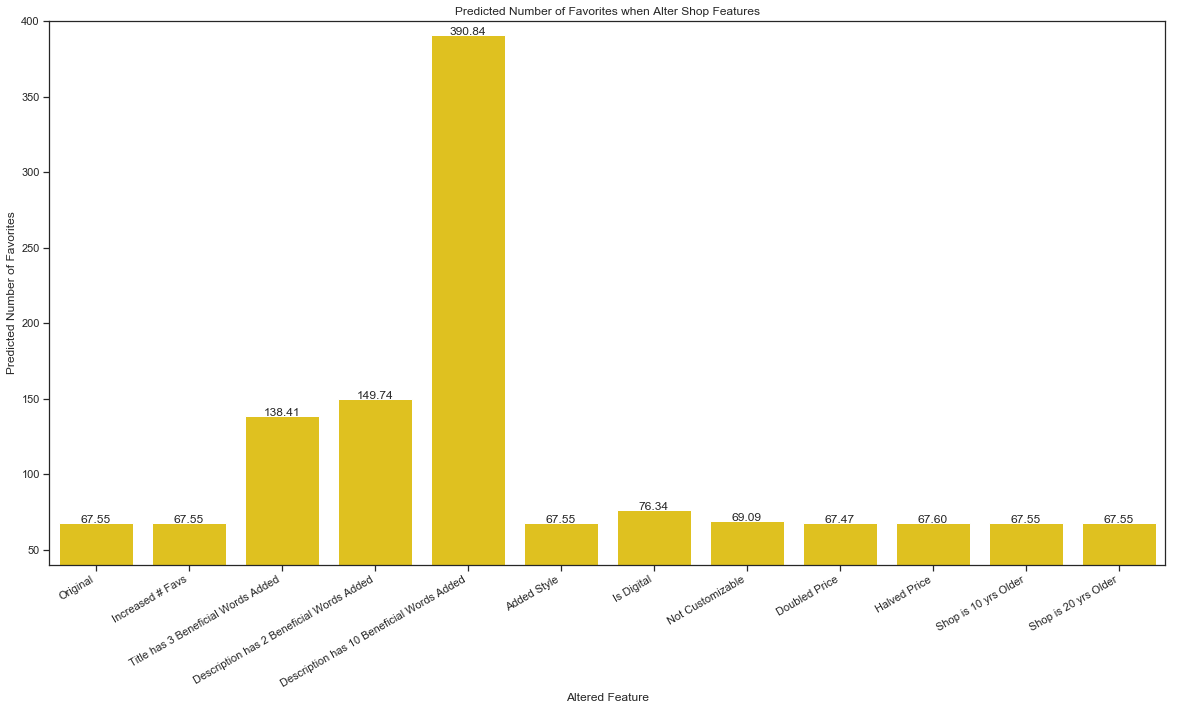

In [169]:
# Set up the matplotlib figure.
f, dx = plt.subplots(figsize=(20, 10))
dx = sns.barplot(data=df, x='feature_changed', y='pred', color='gold', saturation=0.75)
dx.set(title='Predicted Number of Favorites when Alter Shop Features',
        xlabel='Altered Feature', ylabel='Predicted Number of Favorites')
dx.set_xticklabels(dx.get_xticklabels(), rotation=30, ha='right')
dx.set_ylim(40, 400)
# Display values


def show_values_on_bars(dxs):
    def _show_on_single_plot(dx):
        for p in dx.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            dx.text(_x, _y, value, ha="center")

    if isinstance(dxs, np.ndarray):
        for idx, dx in np.ndenumerate(dxs):
            _show_on_single_plot(dx)
    else:
        _show_on_single_plot(dxs)


# Show plot
show_values_on_bars(dx)
plt.show()